# Part A

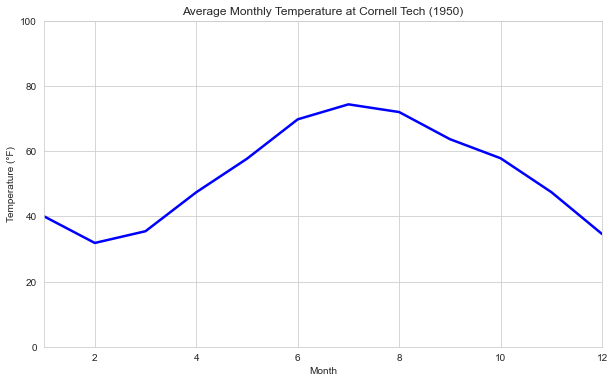

interactive(children=(IntSlider(value=2021, description='Year', max=2021, min=1950), Output()), _dom_classes=(…

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import widgets

import matplotlib.pyplot as plt

# Load the data and convert Ktemp to Fahrenheit
df = pd.read_csv('weather - 286_40.75_t2m_1d.csv')
df['Ftemp'] = (df['Ktemp'] - 273.15) * (9/5) + 32

# Create a new column for month
df['month'] = pd.DatetimeIndex(df['time']).month

# Create a line plot of average temperature by month, with slider for year
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

def update_plot(year):
    plt.clf()
    sns.lineplot(x='month', y='Ftemp', data=df[df['time'].str.contains(str(year))],
                 ci=None, color='blue', lw=2.5)
    plt.xlim(1, 12)
    plt.ylim(0, 100)
    plt.xlabel('Month')
    plt.ylabel('Temperature (°F)')
    plt.title(f'Average Monthly Temperature at Cornell Tech ({year})')
    plt.show()

update_plot(1950) # initialize plot with 1950 data

year_slider = widgets.IntSlider(min=df['time'].str[:4].astype(int).min(),
                                max=df['time'].str[:4].astype(int).max(),
                                value=2021, step=1, description='Year')
widgets.interactive(update_plot, year=year_slider)


# Part B - 1953

In [37]:
# Find the first year where the average temperature passes 55 degrees
df_yearly = df.groupby(df['time'].str[:4])['Ftemp'].mean().reset_index()
warm_year = df_yearly[df_yearly['Ftemp'] > 55]['time'].min()
print('Cornell Tech will finally be warm in', warm_year)


Cornell Tech will finally be warm in 1953


# Part C - Temperature over years and Price of Honey

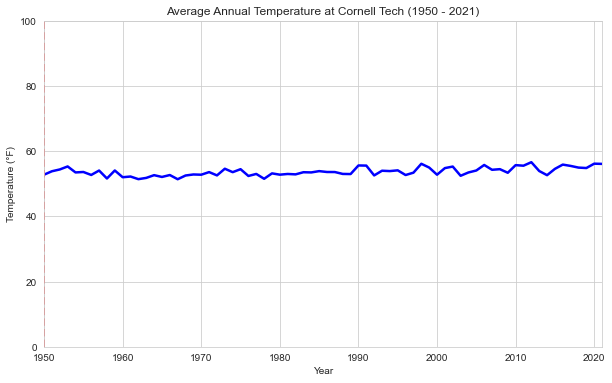

interactive(children=(IntSlider(value=2021, description='Year', max=2021, min=1950), Output()), _dom_classes=(…

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import widgets
import matplotlib.pyplot as plt

# Load the data and convert Ktemp to Fahrenheit
df = pd.read_csv('weather - 286_40.75_t2m_1d.csv')
df['Ftemp'] = (df['Ktemp'] - 273.15) * (9/5) + 32

# Create a new column for year
df['year'] = pd.DatetimeIndex(df['time']).year

# Calculate the mean temperature for each year
yearly_mean = df.groupby('year')['Ftemp'].mean()

# Create a line plot of average temperature by year, with slider for year
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

def update_plot(year):
    plt.clf()
    plt.plot(yearly_mean.index, yearly_mean.values, color='blue', lw=2.5)
    plt.xlim(yearly_mean.index.min(), yearly_mean.index.max())
    plt.ylim(0, 100)
    plt.xlabel('Year')
    plt.ylabel('Temperature (°F)')
    plt.title(f'Average Annual Temperature at Cornell Tech ({yearly_mean.index.min()} - {yearly_mean.index.max()})')
    plt.axvline(x=year, color='red', ls='--', lw=2)
    plt.show()

update_plot(1950) # initialize plot with 1950 data

year_slider = widgets.IntSlider(min=yearly_mean.index.min(),
                                max=yearly_mean.index.max(),
                                value=2021, step=1, description='Year')
widgets.interactive(update_plot, year=year_slider)


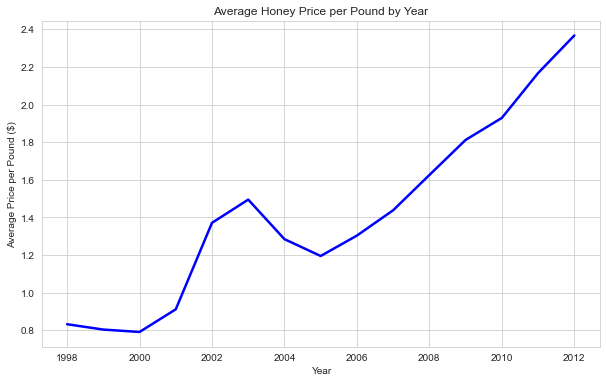

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('honeyproduction.csv')

# Calculate the average price per pound for each year
avg_price = df.groupby('year')['priceperlb'].mean()

# Create a line plot of average price per pound by year
plt.figure(figsize=(10, 6))
plt.plot(avg_price.index, avg_price.values, color='blue', lw=2.5)
plt.xlabel('Year')
plt.ylabel('Average Price per Pound ($)')
plt.title('Average Honey Price per Pound by Year')
plt.show()


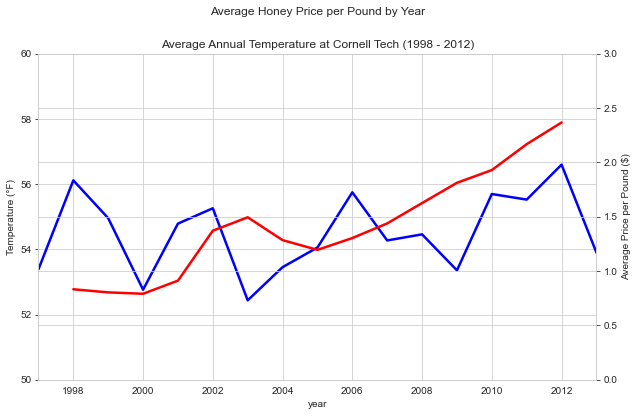

In [40]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data and convert Ktemp to Fahrenheit
df = pd.read_csv('weather - 286_40.75_t2m_1d.csv')
df['Ftemp'] = (df['Ktemp'] - 273.15) * (9/5) + 32

# Create a new column for year
df['year'] = pd.DatetimeIndex(df['time']).year

# Calculate the mean temperature for each year
yearly_mean = df.groupby('year')['Ftemp'].mean()

# Create a new figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a line plot of average temperature by year on the first subplot
sns.set_style('whitegrid')
sns.lineplot(x=yearly_mean.index, y=yearly_mean.values, ax=ax1, color='blue', lw=2.5)
ax1.set_ylim(50, 60)
ax1.set_ylabel('Temperature (°F)')
ax1.set_title('Average Annual Temperature at Cornell Tech (1998 - 2012)')

# Load the honey data and calculate the average price per pound for each year
honey_df = pd.read_csv('honeyproduction.csv')
honey_avg_price = honey_df.groupby('year')['priceperlb'].mean()

# Create a line plot of average honey price per pound by year on the second subplot
ax2 = ax1.twinx()
sns.lineplot(x=honey_avg_price.index, y=honey_avg_price.values, ax=ax2, color='red', lw=2.5)
ax2.set_ylim(0, 3)
ax2.set_ylabel('Average Price per Pound ($)')
ax2.set_title('Average Honey Price per Pound by Year', y=1.1)

# Set x-axis limits
plt.xlim(1997, 2013)
plt.xlabel('Year')

plt.show()

## This is interesting. As the years go on, the price of honey has been increasing. Visually, they do not seem related, but this puts the effects of global warming very clear. This could be attributed to increase in demand for honey or reducation in number of bees.